## Code

In [ ]:
import os
import re
import PIL
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import linear_model, naive_bayes, ensemble, tree, svm, model_selection,\
                    preprocessing, feature_extraction

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATASET.csv")
display(df)

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE
...,...,...
52697,Yes the best,POSITIVE
52698,Spotify won my heart in Feb 2024 You won my he...,POSITIVE
52699,I tried to open the app and it wont open I res...,POSITIVE
52700,Good,POSITIVE


In [ ]:
print(f"Number of duplicates: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicates after: {df.duplicated().sum()}")

Number of duplicates: 1229
Number of duplicates after: 0


In [ ]:
df.isnull().sum()

,0
Review,1
label,0


In [ ]:
df = df.dropna()
df.isnull().sum()

,0
Review,0
label,0


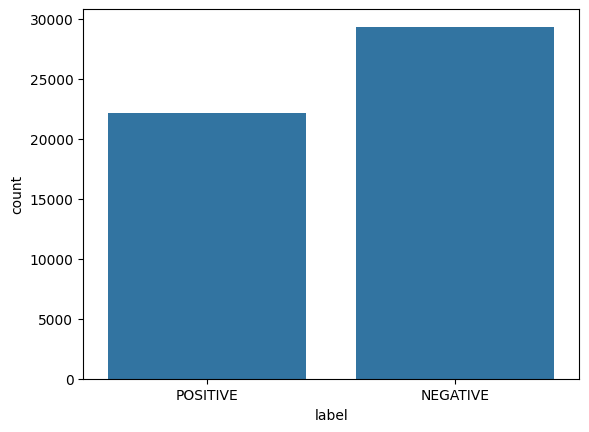

In [ ]:
sns.countplot(x = 'label', data = df)
plt.show()

This graph visualizes the distribution of data in the `label` column. Although the negative is slightly higher than the positive, their difference can still be considered as minimal since the standard for an overly populated class is 80% of the whole population.

In [ ]:
df['label']= df['label'].map({'POSITIVE': 1, 'NEGATIVE':0})

<ipython-input-79-78f1ea300c5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label']= df['label'].map({'POSITIVE': 1, 'NEGATIVE':0})


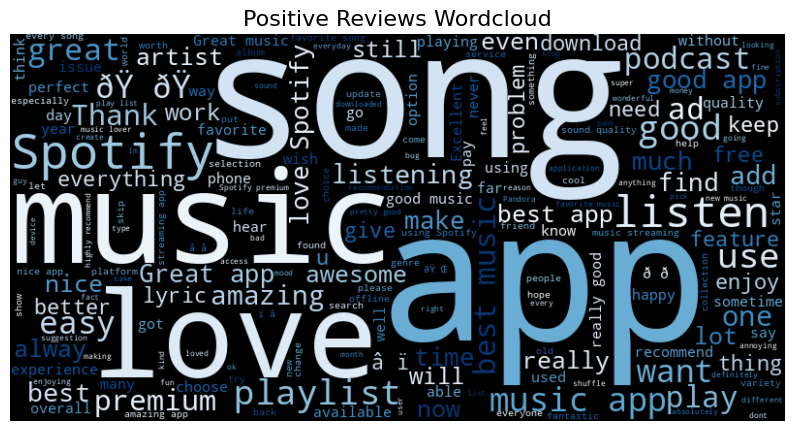

In [ ]:
from wordcloud import WordCloud
positiveReview = ' '.join(df[df['label'] == 1]['Review'])
positiveReview_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(positiveReview)

plt.figure(figsize=(10, 6))
plt.imshow(positiveReview_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Wordcloud', fontsize=16)
plt.show()

The word cloud highlights the most frequently mentioned terms in positive Spotify reviews. Prominent words like 'app', 'song', 'music', and 'love' may indicate their satisfaction towards Spotify's diverse music library or just a general praise for music or the application itself. They most likely enjoyed the ease to access their favorite songs and podcasts all in one platform as manifested by other noticeable words like 'listen', 'music app', and 'Spotify'.

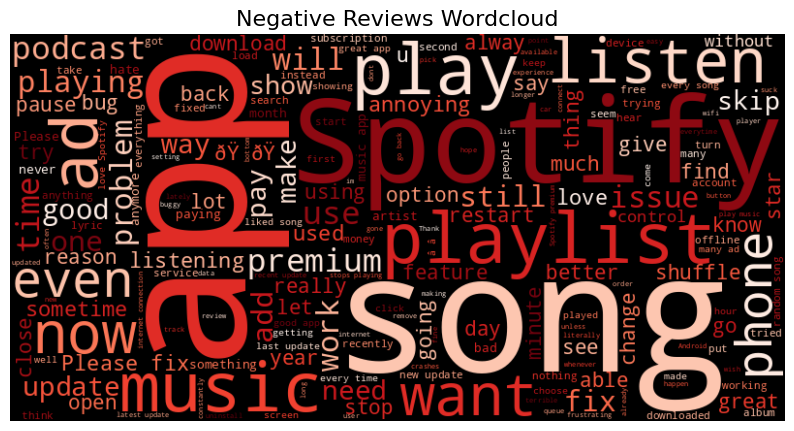

In [ ]:
negativeReview = ' '.join(df[df['label'] == 0]['Review'])
negativeReview_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negativeReview)

plt.figure(figsize=(10, 6))
plt.imshow(negativeReview_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Wordcloud', fontsize=16)
plt.show()

The word cloud highlights the most frequently mentioned terms in negative Spotify reviews. It shows that certain terms like 'song', 'app', and 'Spotify' appear in both positive and negative reviews, indicating that users have strong feelings about these aspects of Spotify, but their experiences vary. This time, the users might be expressing their frustrations towards the application because of technical issues such as bugs and glitches which surely affected their listening experience. Some noticeable words include 'playlist', 'play', and 'ad' which likely reflect users' frustration and complaints about repetitive song recommendations and frequent appearance of ads.

In [ ]:
X = df['Review']
y = df['label']

In [ ]:
vectorizer = feature_extraction.text.CountVectorizer()

X = vectorizer.fit_transform(X)
print("Number of features: ", len(vectorizer.get_feature_names_out()))

Number of features:  22392


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 22, stratify = y)

**Random Forest (with special characters)**

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=32)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8594463331714425
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.93      0.88      5869
    positive       0.89      0.77      0.82      4426

    accuracy                           0.86     10295
   macro avg       0.87      0.85      0.85     10295
weighted avg       0.86      0.86      0.86     10295

Confusion Matrix:
 [[5447  422]
 [1025 3401]]


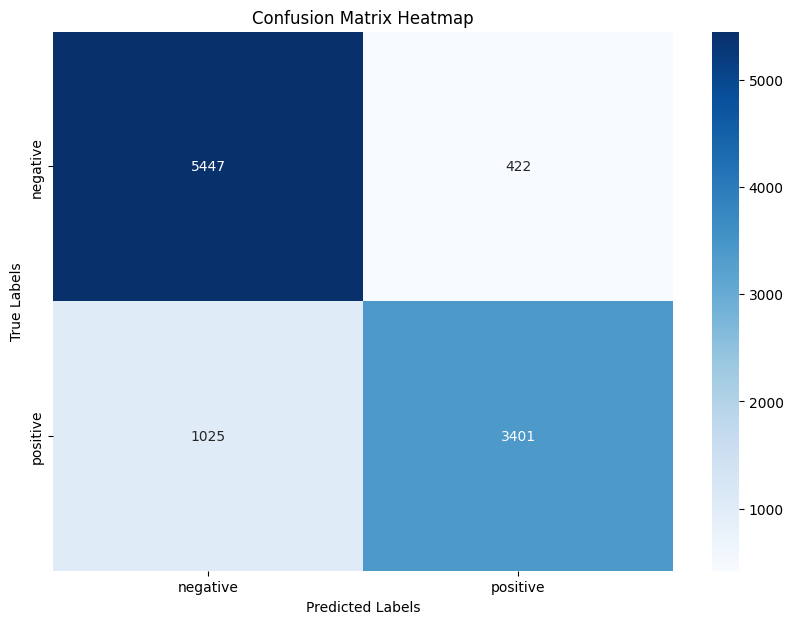

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ["negative", "positive"], yticklabels= ["negative", "positive"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

**Random Forest (without special characters)**

In [ ]:
df["Review"] = df["Review"].str.replace(r"[^a-zA-Z0-9\s]", " ", regex = True)
df.head()

<ipython-input-88-b665e6eb3f2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Review"] = df["Review"].str.replace(r"[^a-zA-Z0-9\s]", " ", regex = True)


,Review,label
0,Great music service the audio is high quality...,1
1,Please ignore previous negative rating This a...,1
2,This pop up Get the best Spotify experience o...,0
3,Really buggy and terrible to use as of recently,0
4,Dear Spotify why do I get songs that I didn t ...,0


In [ ]:
X = df['Review']
y = df['label']

In [ ]:
vectorizer = feature_extraction.text.CountVectorizer()

X = vectorizer.fit_transform(X)
print("Number of features: ", len(vectorizer.get_feature_names_out()))

Number of features:  21636


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 22, stratify = y)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=32)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8605148130160272
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.93      0.88      5869
    positive       0.89      0.77      0.83      4426

    accuracy                           0.86     10295
   macro avg       0.87      0.85      0.86     10295
weighted avg       0.86      0.86      0.86     10295

Confusion Matrix:
 [[5432  437]
 [ 999 3427]]


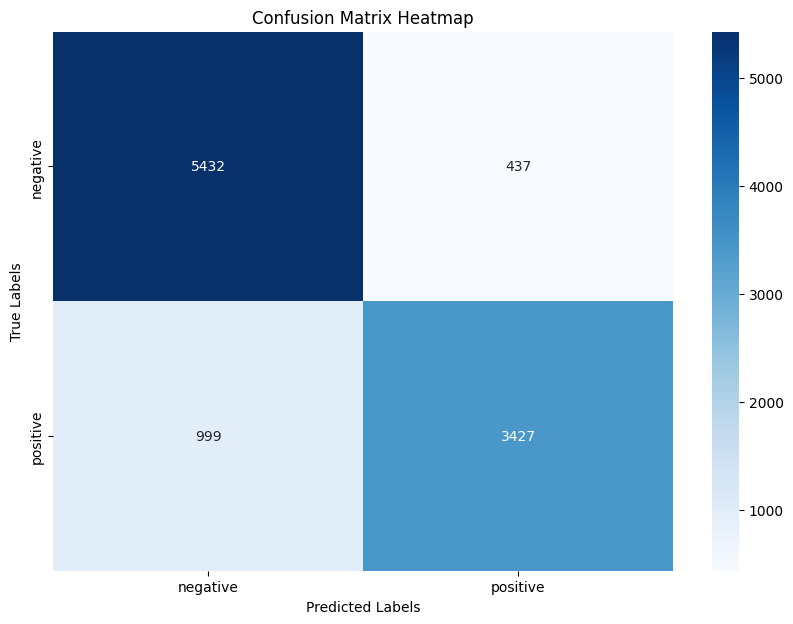

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ["negative", "positive"], yticklabels= ["negative", "positive"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

**Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8885866925692083
Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.90      0.90      5869
    positive       0.87      0.87      0.87      4426

    accuracy                           0.89     10295
   macro avg       0.89      0.89      0.89     10295
weighted avg       0.89      0.89      0.89     10295

Confusion Matrix:
 [[5288  581]
 [ 566 3860]]


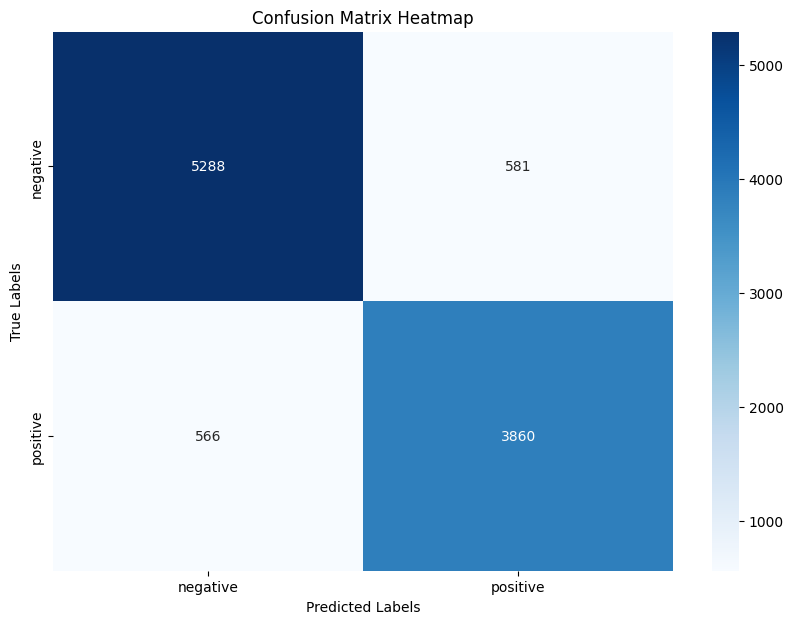

In [ ]:



conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ["negative", "positive"], yticklabels= ["negative", "positive"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()